In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df_train = pd.read_csv('Loan_train.csv')
df_train

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0
2,2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0
3,3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0
4,4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
58640,58640,34,120000,MORTGAGE,5.0,EDUCATION,D,25000,15.95,0.21,Y,10,0
58641,58641,28,28800,RENT,0.0,MEDICAL,C,10000,12.73,0.35,N,8,1
58642,58642,23,44000,RENT,7.0,EDUCATION,D,6800,16.00,0.15,N,2,1
58643,58643,22,30000,RENT,2.0,EDUCATION,A,5000,8.90,0.17,N,3,0


In [3]:
df_train.drop('id',axis=1,inplace=True)
df_train.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,loan_status
count,58645.000000,5.864500e+04,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000
mean,27.550857,6.404617e+04,4.701015,9217.556518,10.677874,0.159238,5.813556,0.142382
std,6.033216,3.793111e+04,3.959784,5563.807384,3.034697,0.091692,4.029196,0.349445
min,20.000000,4.200000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,0.000000
25%,23.000000,4.200000e+04,2.000000,5000.000000,7.880000,0.090000,3.000000,0.000000
50%,26.000000,5.800000e+04,4.000000,8000.000000,10.750000,0.140000,4.000000,0.000000
75%,30.000000,7.560000e+04,7.000000,12000.000000,12.990000,0.210000,8.000000,0.000000
max,123.000000,1.900000e+06,123.000000,35000.000000,23.220000,0.830000,30.000000,1.000000


In [4]:
df_train.nunique()

person_age                      53
person_income                 2641
person_home_ownership            4
person_emp_length               36
loan_intent                      6
loan_grade                       7
loan_amnt                      545
loan_int_rate                  362
loan_percent_income             61
cb_person_default_on_file        2
cb_person_cred_hist_length      29
loan_status                      2
dtype: int64

In [5]:
df_train.isnull().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
loan_status                   0
dtype: int64

In [6]:
print(df_train.dtypes)

person_age                      int64
person_income                   int64
person_home_ownership          object
person_emp_length             float64
loan_intent                    object
loan_grade                     object
loan_amnt                       int64
loan_int_rate                 float64
loan_percent_income           float64
cb_person_default_on_file      object
cb_person_cred_hist_length      int64
loan_status                     int64
dtype: object


In [7]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ['loan_intent', 'person_home_ownership', 'cb_person_default_on_file']

ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(drop='first'), categorical_features)], remainder='passthrough')

df_train_encoded = ct.fit_transform(df_train)
encoded_features =  ct.named_transformers_['encoder'].get_feature_names_out(categorical_features)

df_train_encoded = pd.DataFrame(df_train_encoded, columns=list(encoded_features) + list(df_train.drop(columns=categorical_features).columns))
df_train_encoded.reset_index(drop=True, inplace=True)

df_train_encoded

,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,cb_person_default_on_file_Y,person_age,person_income,person_emp_length,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,loan_status
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,37,35000,0.0,B,6000,11.49,0.17,14,0
1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,22,56000,6.0,C,4000,13.35,0.07,2,0
2,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,29,28800,8.0,A,6000,8.9,0.21,10,0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,30,70000,14.0,B,12000,11.11,0.17,5,0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,22,60000,2.0,A,6000,6.92,0.1,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58640,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,34,120000,5.0,D,25000,15.95,0.21,10,0
58641,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,28,28800,0.0,C,10000,12.73,0.35,8,1
58642,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,23,44000,7.0,D,6800,16.0,0.15,2,1
58643,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,22,30000,2.0,A,5000,8.9,0.17,3,0


In [8]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df_train_encoded['loan_grade'] = le.fit_transform(df_train_encoded['loan_grade'])

df_train_encoded

,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,cb_person_default_on_file_Y,person_age,person_income,person_emp_length,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,loan_status
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,37,35000,0.0,1,6000,11.49,0.17,14,0
1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,22,56000,6.0,2,4000,13.35,0.07,2,0
2,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,29,28800,8.0,0,6000,8.9,0.21,10,0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,30,70000,14.0,1,12000,11.11,0.17,5,0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,22,60000,2.0,0,6000,6.92,0.1,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58640,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,34,120000,5.0,3,25000,15.95,0.21,10,0
58641,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,28,28800,0.0,2,10000,12.73,0.35,8,1
58642,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,23,44000,7.0,3,6800,16.0,0.15,2,1
58643,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,22,30000,2.0,0,5000,8.9,0.17,3,0


In [9]:
corr = df_train_encoded.corr()

print(corr['loan_status'])

loan_intent_EDUCATION         -0.051005
loan_intent_HOMEIMPROVEMENT    0.031063
loan_intent_MEDICAL            0.049139
loan_intent_PERSONAL          -0.012461
loan_intent_VENTURE           -0.064378
person_home_ownership_OTHER    0.002918
person_home_ownership_OWN     -0.087556
person_home_ownership_RENT     0.239620
cb_person_default_on_file_Y    0.186962
person_age                    -0.001130
person_income                 -0.169956
person_emp_length             -0.100428
loan_grade                     0.385908
loan_amnt                      0.144982
loan_int_rate                  0.338948
loan_percent_income            0.378280
cb_person_cred_hist_length    -0.003030
loan_status                    1.000000
Name: loan_status, dtype: float64


loan_intent_EDUCATION           1.429639
loan_intent_HOMEIMPROVEMENT     2.541384
loan_intent_MEDICAL             1.610233
loan_intent_PERSONAL            1.749645
loan_intent_VENTURE             1.750445
person_home_ownership_OTHER    25.611866
person_home_ownership_OWN       3.968122
person_home_ownership_RENT     -0.086809
cb_person_default_on_file_Y     1.978306
person_age                      1.965497
person_income                  10.457723
person_emp_length                2.05443
loan_grade                      0.869415
loan_amnt                       1.188578
loan_int_rate                    0.20002
loan_percent_income             0.917473
cb_person_cred_hist_length      1.618503
loan_status                     2.046848
dtype: object


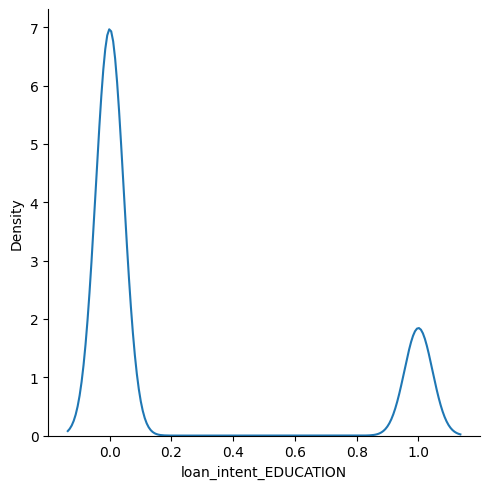

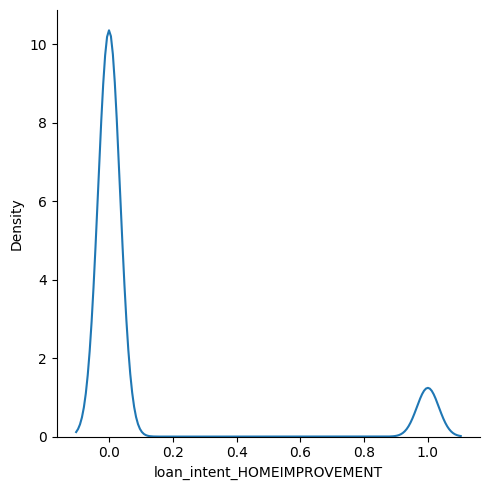

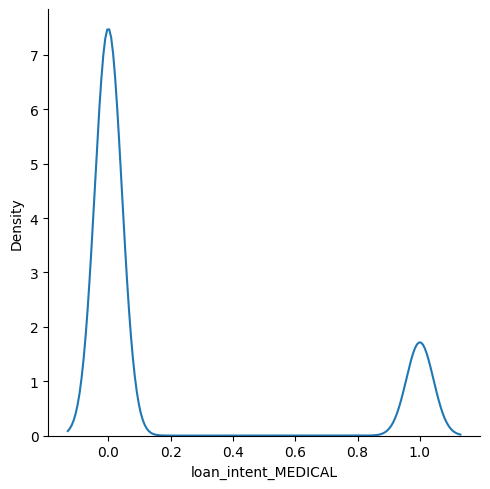

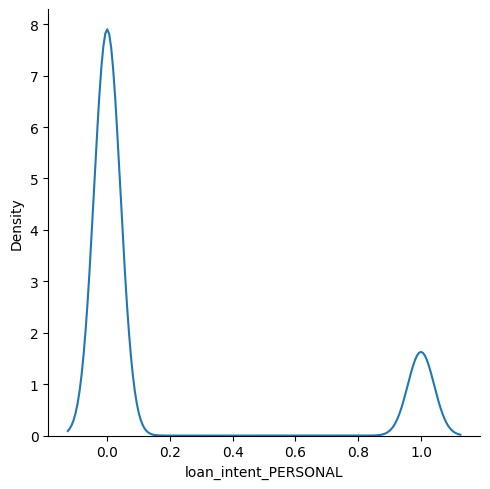

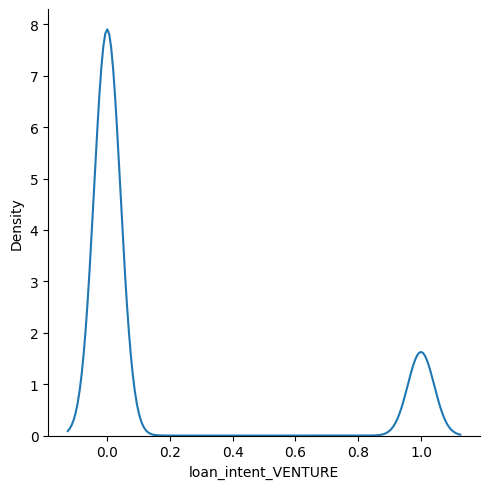

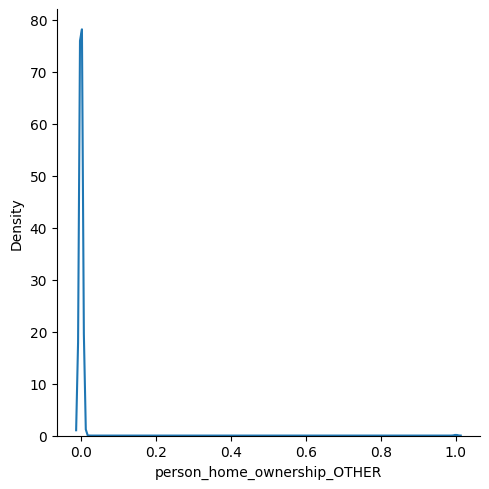

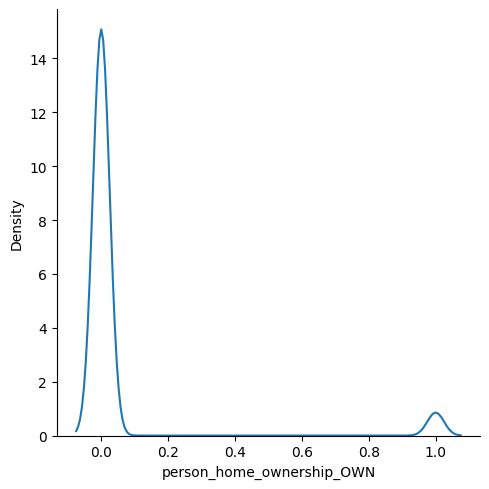

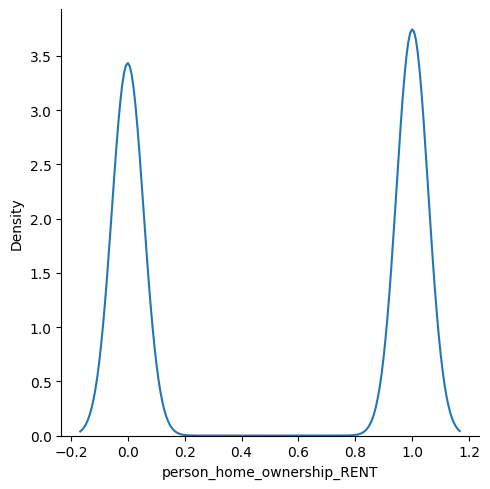

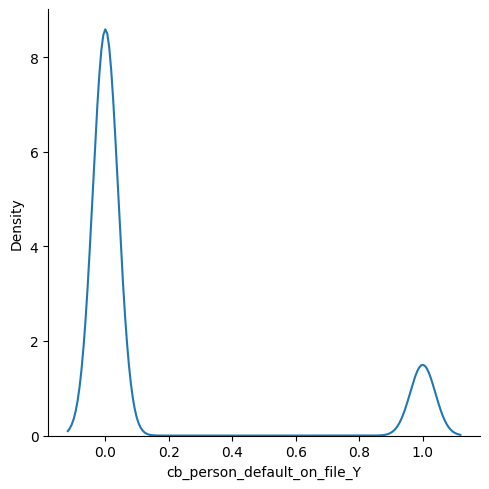

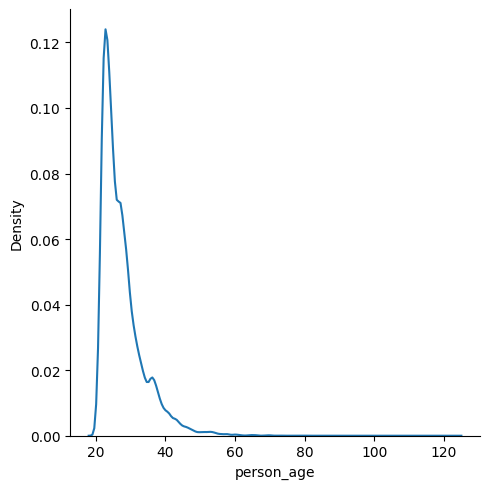

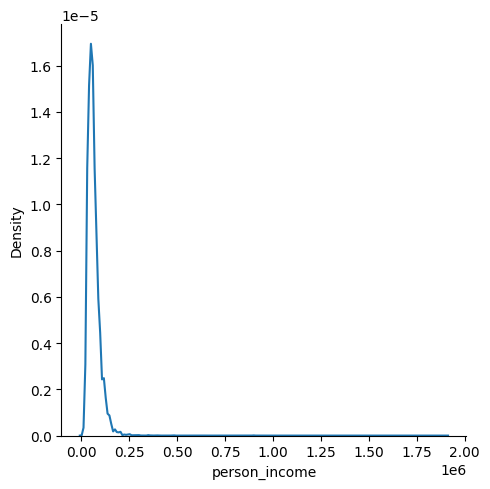

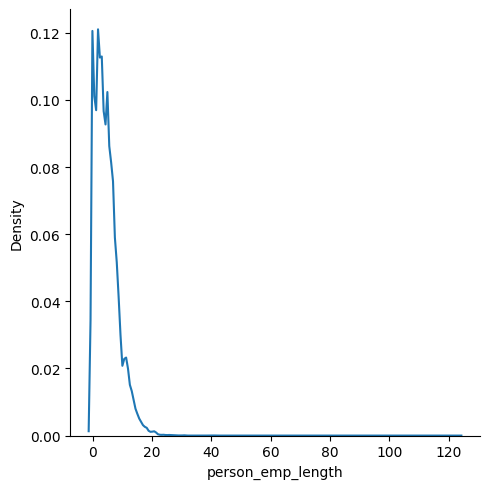

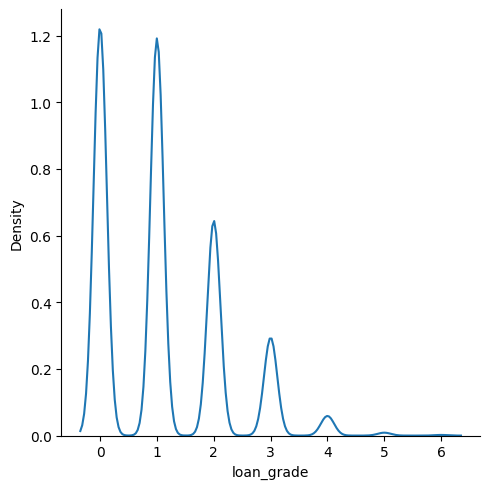

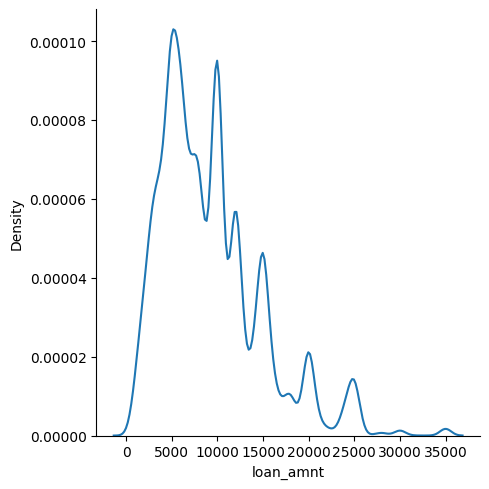

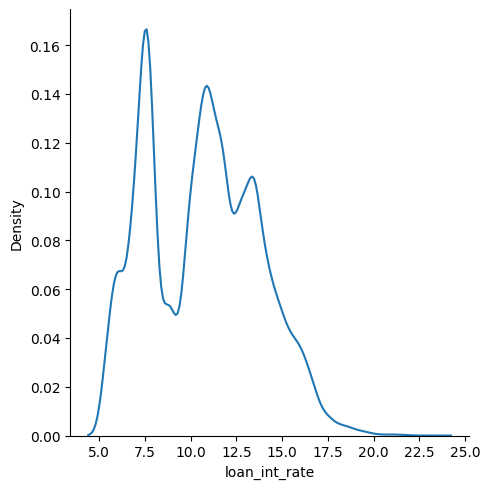

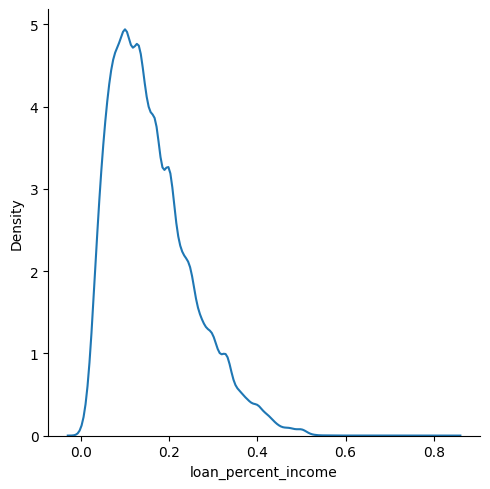

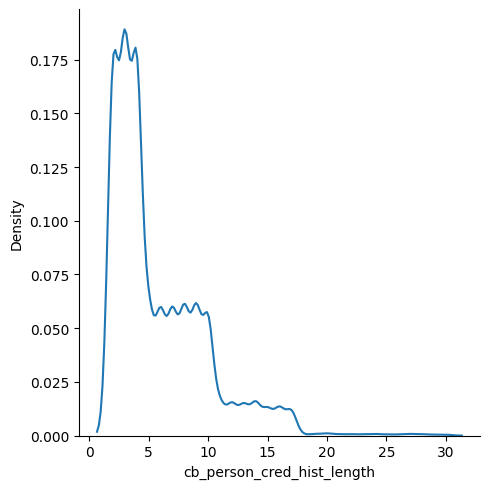

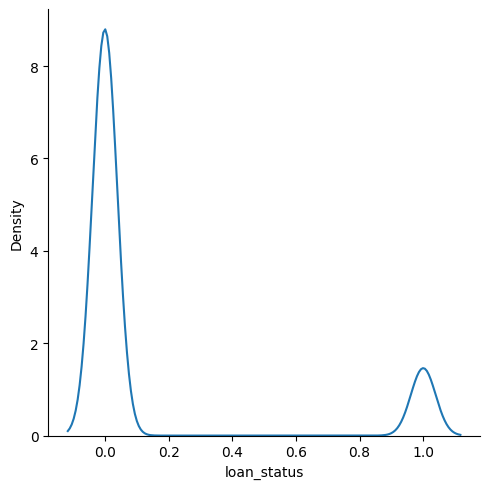

In [10]:
import seaborn as sns

for i in df_train_encoded.columns:
    sns.displot(df_train_encoded[i], kind='kde')
print(df_train_encoded.skew())

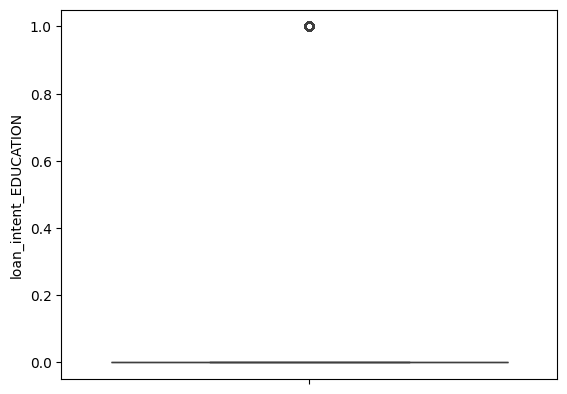

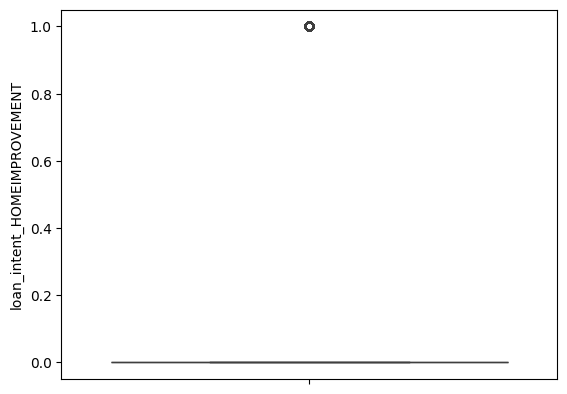

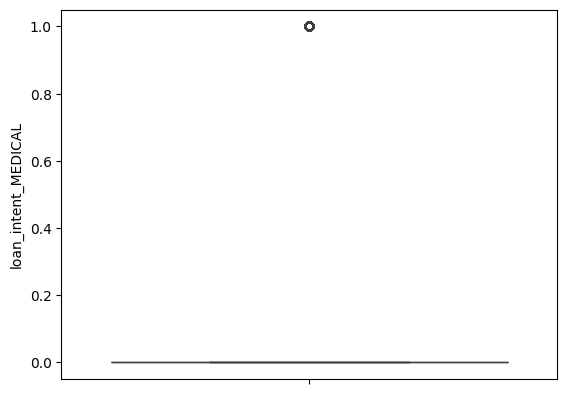

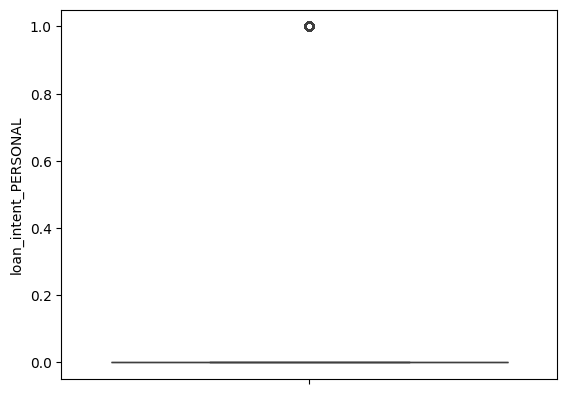

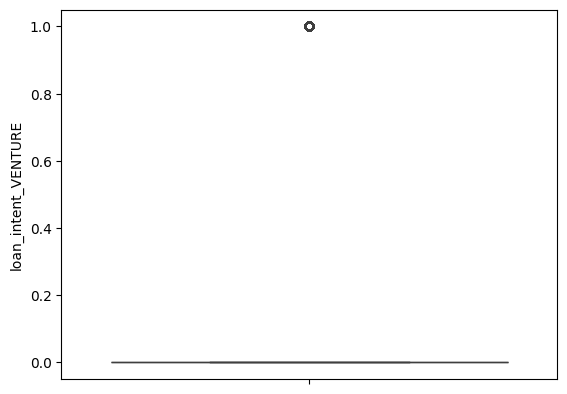

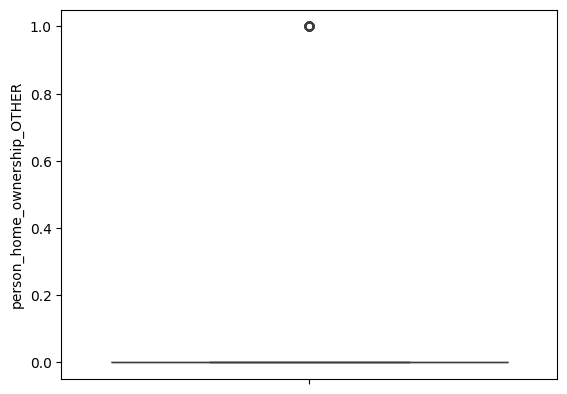

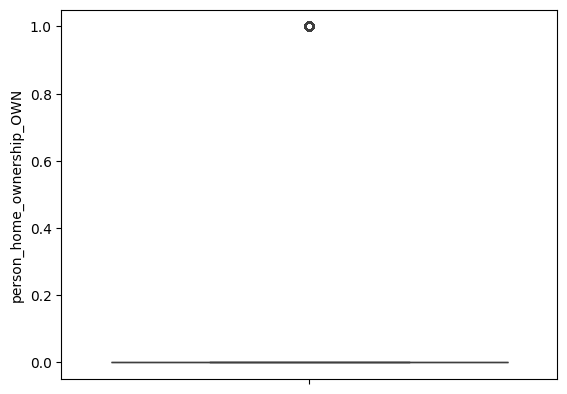

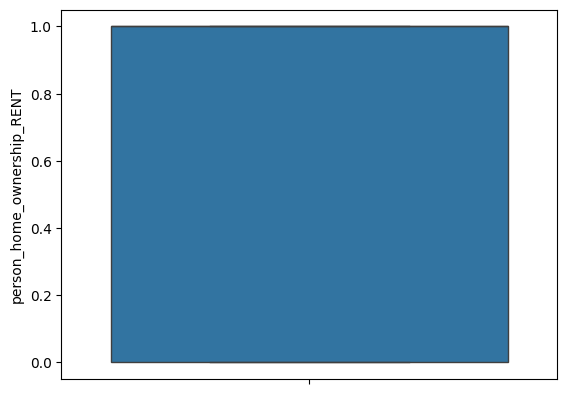

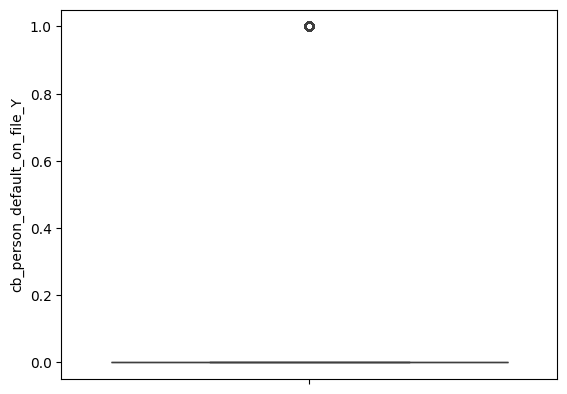

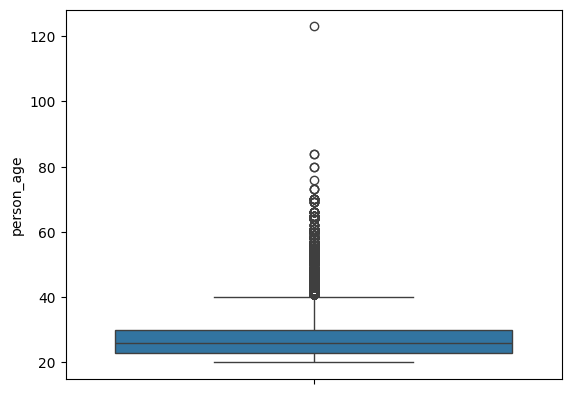

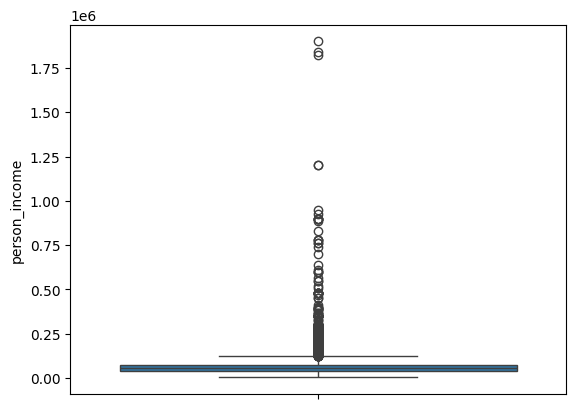

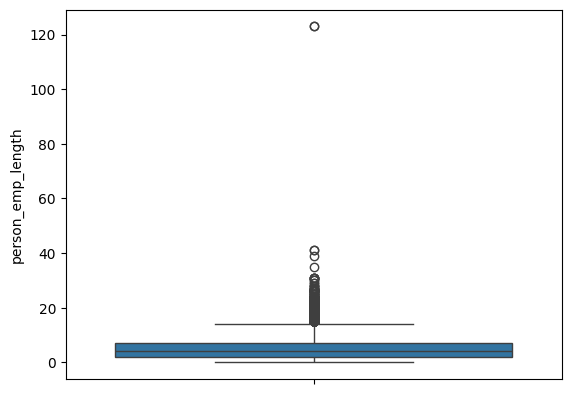

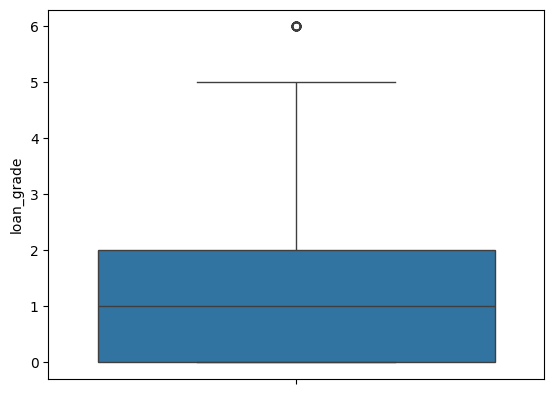

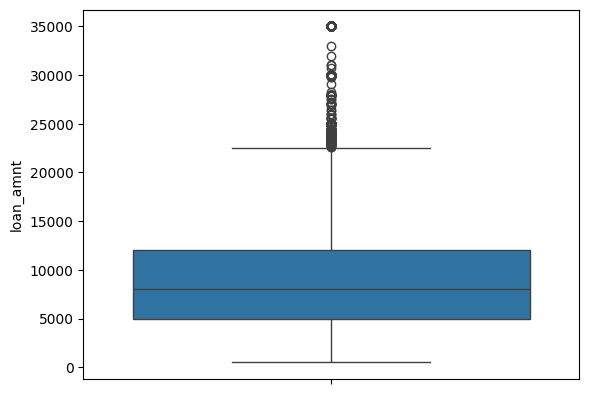

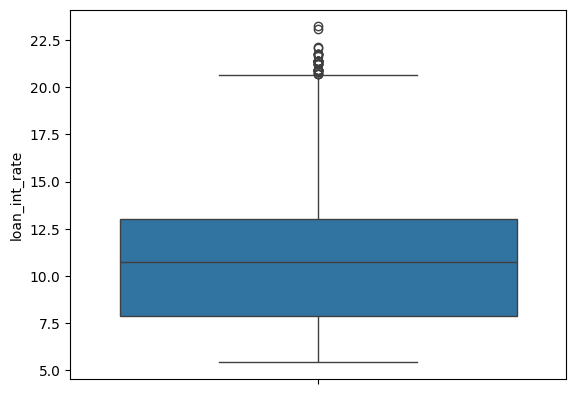

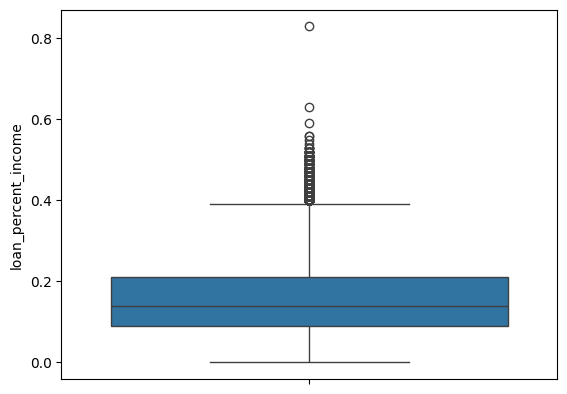

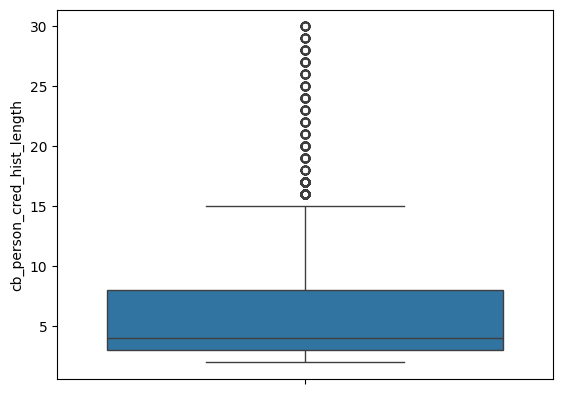

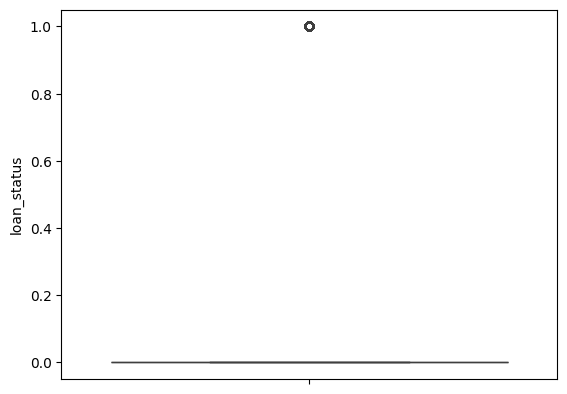

In [11]:
for i in df_train_encoded.columns:
    sns.boxplot(df_train_encoded[i])
    plt.show()

In [12]:
outlier_columns = ['cb_person_cred_hist_length', 'loan_percent_income', 'loan_int_rate', 'loan_amnt', 'person_emp_length', 'person_income', 'person_age']

def iqr_clipping(df, columns, multiplier=1.5):
    df_clipped = df.copy()
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - multiplier * IQR
        upper_bound = Q3 + multiplier * IQR
        df_clipped[col] = df[col].clip(lower=lower_bound, upper=upper_bound)
    return df_clipped

df_train_clipped = iqr_clipping(df_train_encoded, outlier_columns, multiplier=1.5)

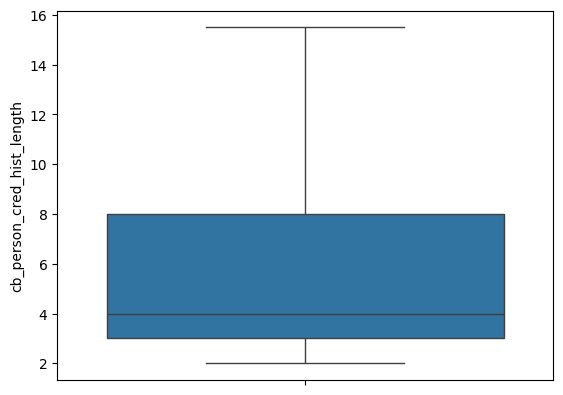

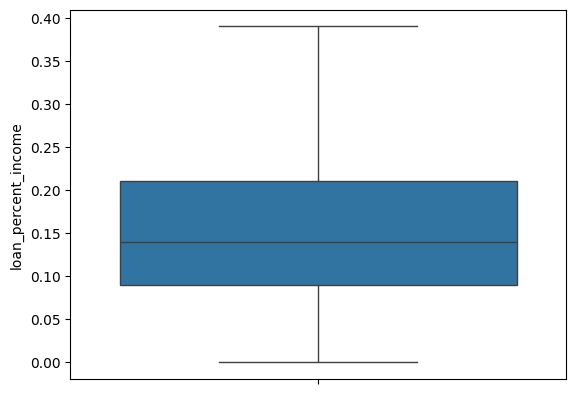

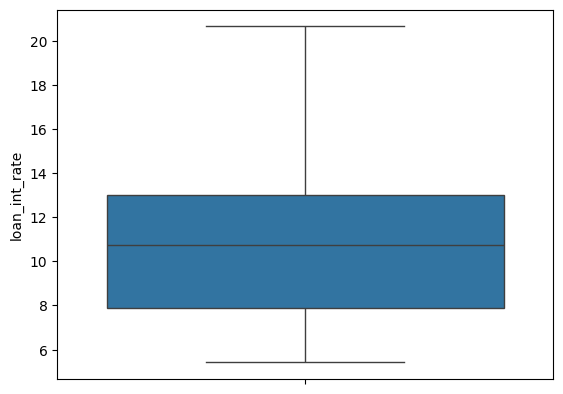

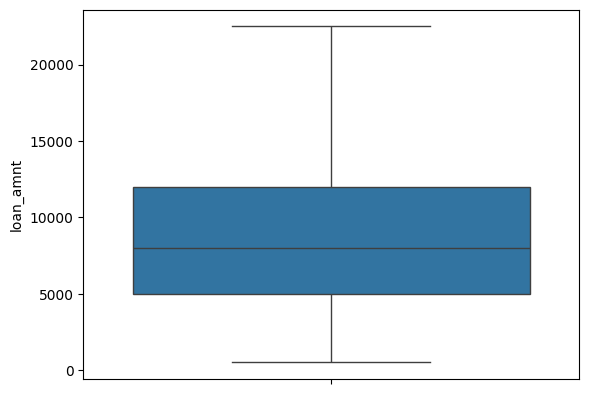

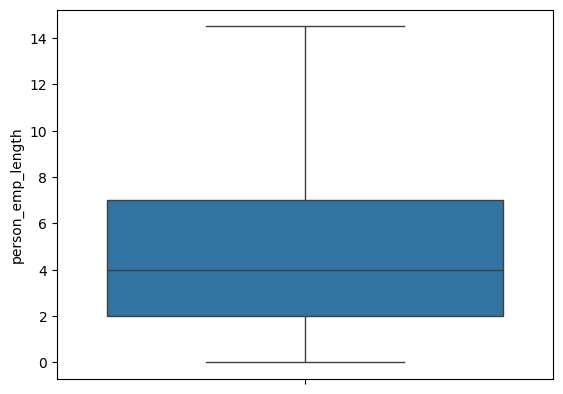

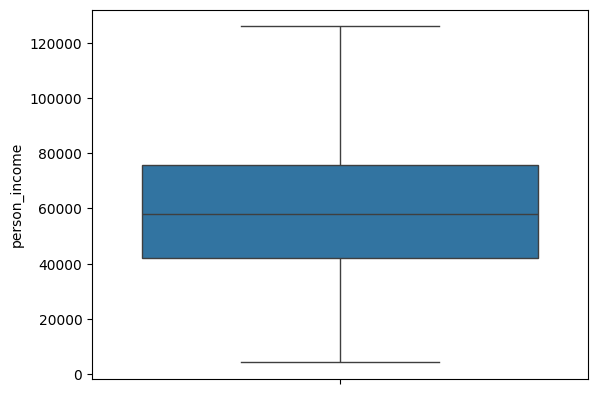

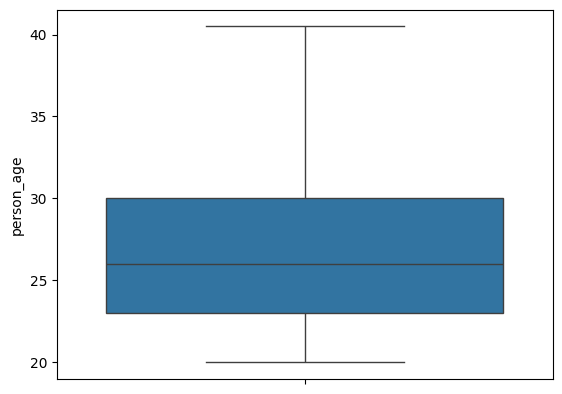

In [13]:
for i in outlier_columns:
    sns.boxplot(df_train_clipped[i])
    plt.show()

In [14]:
corr = df_train_clipped.corr()

print(corr['loan_status'])

loan_intent_EDUCATION         -0.051005
loan_intent_HOMEIMPROVEMENT    0.031063
loan_intent_MEDICAL            0.049139
loan_intent_PERSONAL          -0.012461
loan_intent_VENTURE           -0.064378
person_home_ownership_OTHER    0.002918
person_home_ownership_OWN     -0.087556
person_home_ownership_RENT     0.239620
cb_person_default_on_file_Y    0.186962
person_age                    -0.005835
person_income                 -0.218124
person_emp_length             -0.108639
loan_grade                     0.385908
loan_amnt                      0.144788
loan_int_rate                  0.338910
loan_percent_income            0.372071
cb_person_cred_hist_length    -0.006036
loan_status                    1.000000
Name: loan_status, dtype: float64


In [15]:
df_train_clipped.skew()

loan_intent_EDUCATION           1.429639
loan_intent_HOMEIMPROVEMENT     2.541384
loan_intent_MEDICAL             1.610233
loan_intent_PERSONAL            1.749645
loan_intent_VENTURE             1.750445
person_home_ownership_OTHER    25.611866
person_home_ownership_OWN       3.968122
person_home_ownership_RENT     -0.086809
cb_person_default_on_file_Y     1.978306
person_age                      1.070064
person_income                   0.783787
person_emp_length               0.809945
loan_grade                      0.869415
loan_amnt                       0.833442
loan_int_rate                   0.195841
loan_percent_income             0.748665
cb_person_cred_hist_length      1.097443
loan_status                     2.046848
dtype: object

In [18]:
catcol = df_train_clipped.select_dtypes(include='object')

for i in catcol:
    df_train_clipped[i] = df_train_clipped[i].astype(float)
df_train_clipped.dtypes

loan_intent_EDUCATION          float64
loan_intent_HOMEIMPROVEMENT    float64
loan_intent_MEDICAL            float64
loan_intent_PERSONAL           float64
loan_intent_VENTURE            float64
person_home_ownership_OTHER    float64
person_home_ownership_OWN      float64
person_home_ownership_RENT     float64
cb_person_default_on_file_Y    float64
person_age                     float64
person_income                  float64
person_emp_length              float64
loan_grade                       int32
loan_amnt                      float64
loan_int_rate                  float64
loan_percent_income            float64
cb_person_cred_hist_length     float64
loan_status                    float64
dtype: object

In [19]:
from sklearn.model_selection import train_test_split

Features = df_train_clipped.drop(columns={'loan_status', 'loan_intent_EDUCATION', 'loan_intent_HOMEIMPROVEMENT', 'loan_intent_MEDICAL', 'loan_intent_PERSONAL', 'loan_intent_VENTURE', 'person_age', 'cb_person_cred_hist_length', 'person_emp_length'},axis=1)
Labels = df_train_clipped['loan_status']

from imblearn.ensemble import BalancedBaggingClassifier
from sklearn.tree import DecisionTreeClassifier

balanced_bagging = BalancedBaggingClassifier(estimator=DecisionTreeClassifier(), sampling_strategy='auto', replacement=False, random_state=42)
balanced_bagging.fit(Features, Labels)


Features_train, Features_test, Labels_train, Labels_test = train_test_split(Features, Labels, test_size=0.2, shuffle=True, random_state=42)

c:\Users\jinay\AppData\Local\Programs\Python\Python312\Lib\site-packages\dask\dataframe\__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


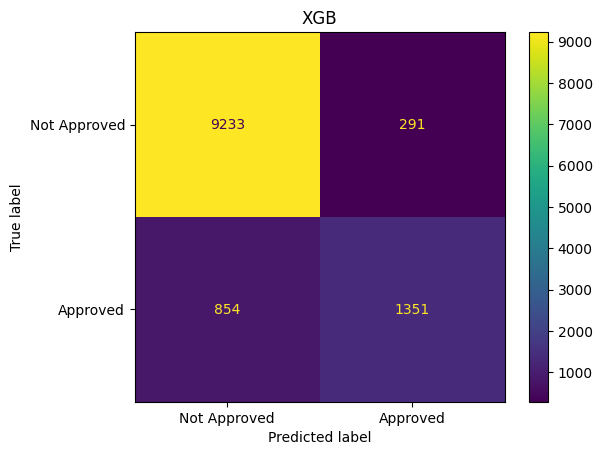

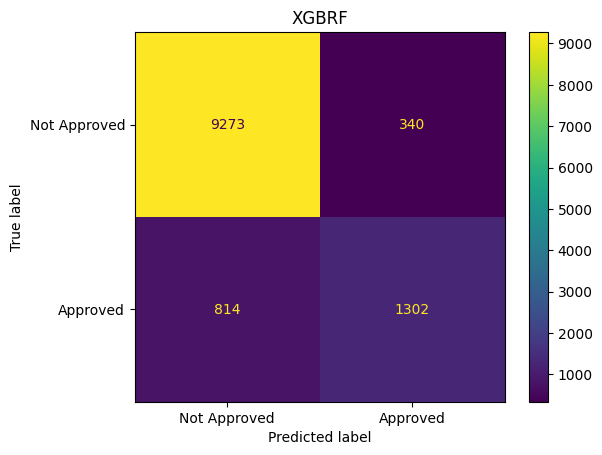

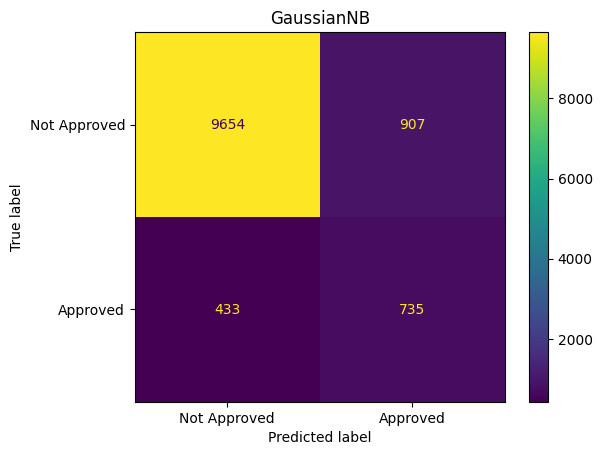

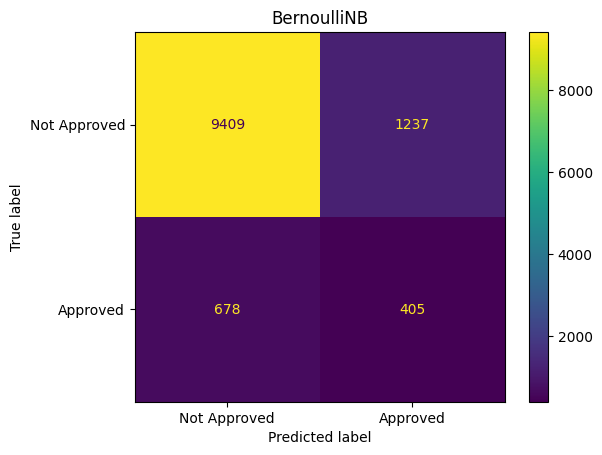

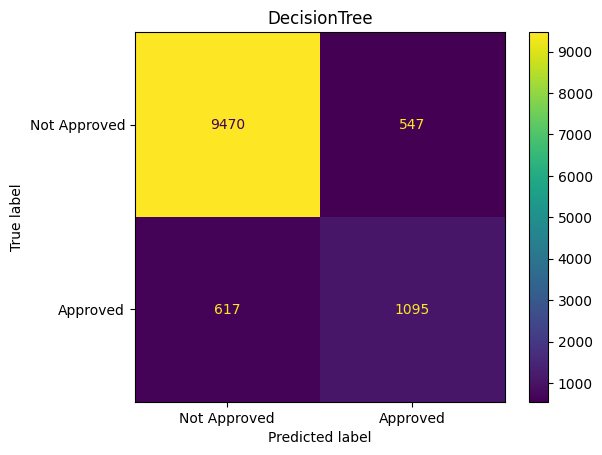

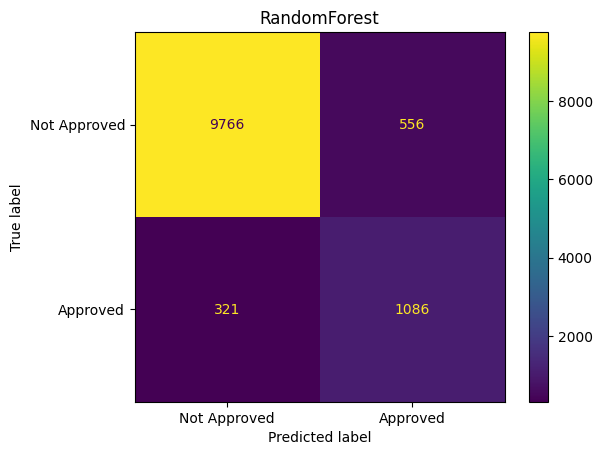

c:\Users\jinay\AppData\Local\Programs\Python\Python312\Lib\site-packages\imblearn\ensemble\_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
c:\Users\jinay\AppData\Local\Programs\Python\Python312\Lib\site-packages\imblearn\ensemble\_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(
c:\Users\jinay\AppData\Local\Programs\Python\Python312\Lib\site-packages\imblearn\ensemble\_forest.py:601: FutureWarning: The default of `bootstrap` will change from `True` to `False` in version 0.13. This change will follow the implementation proposed in the original paper. Set

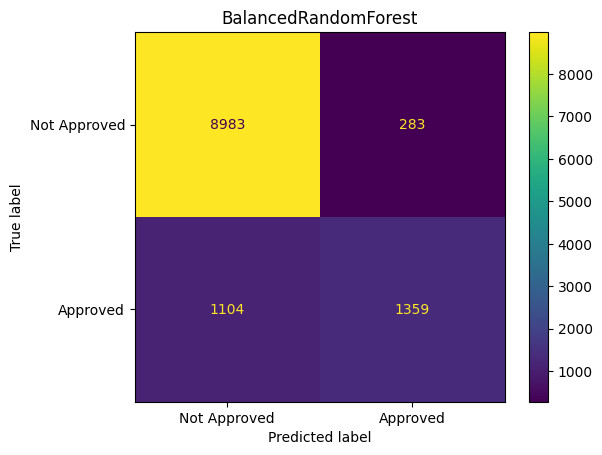

c:\Users\jinay\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jinay\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jinay\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jinay\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is 

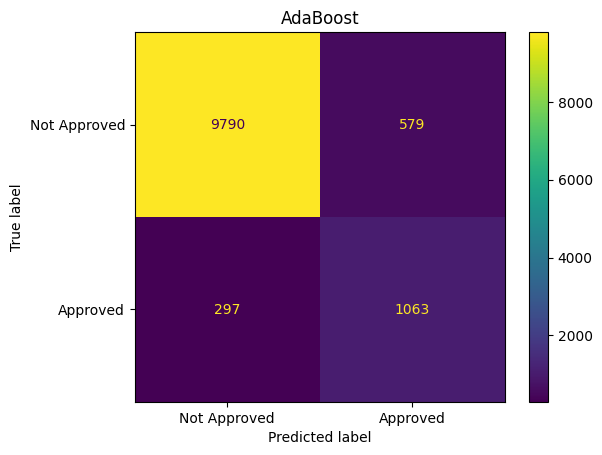

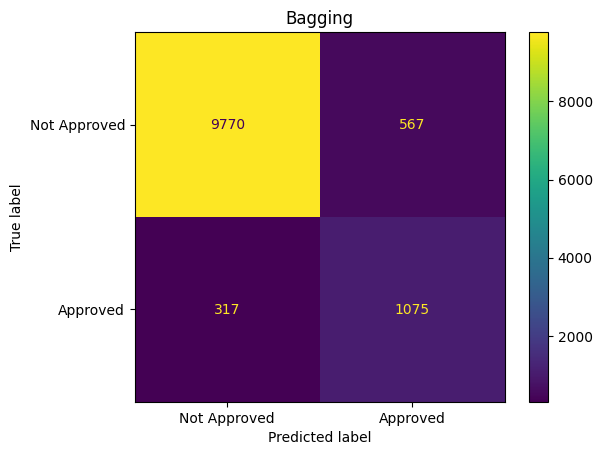

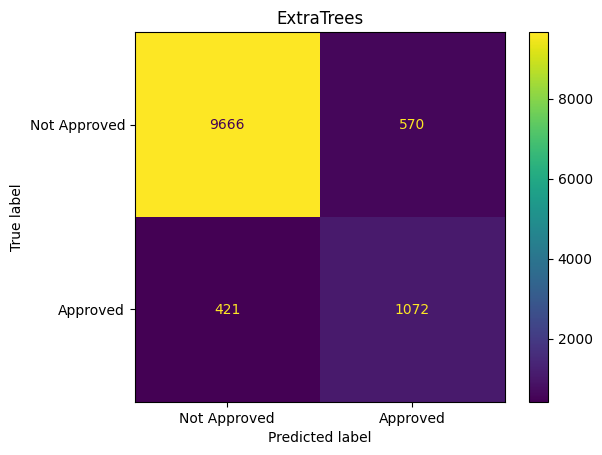

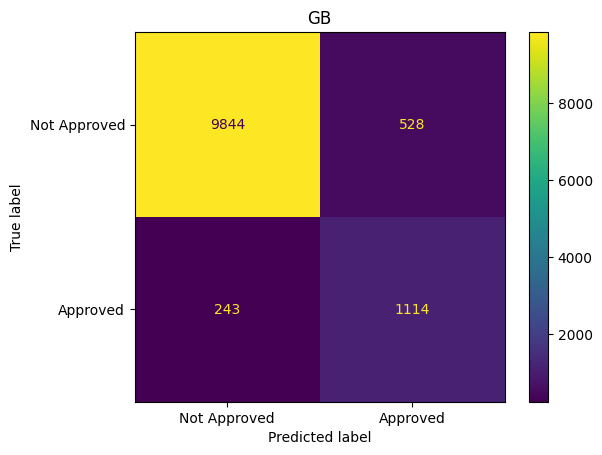

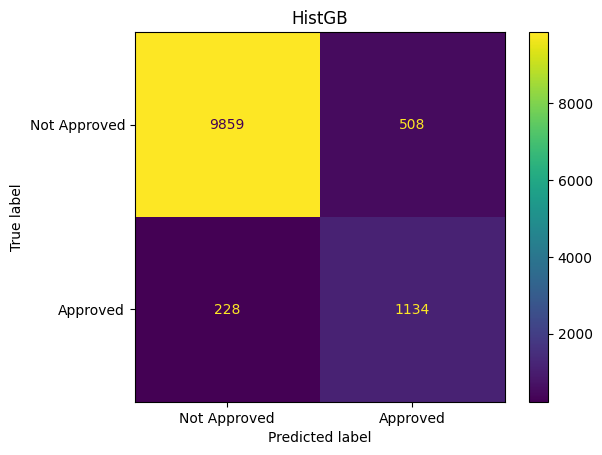

c:\Users\jinay\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\jinay\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

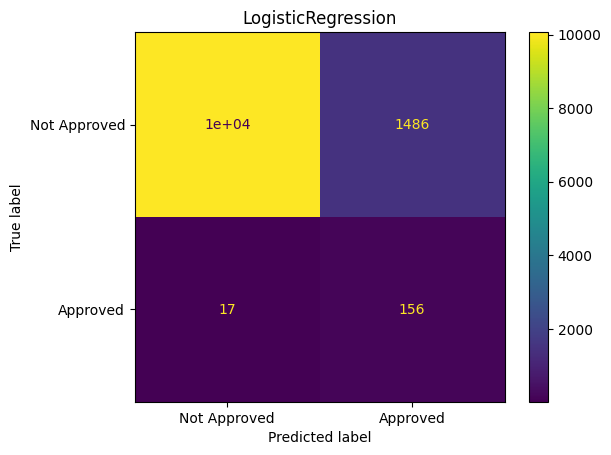

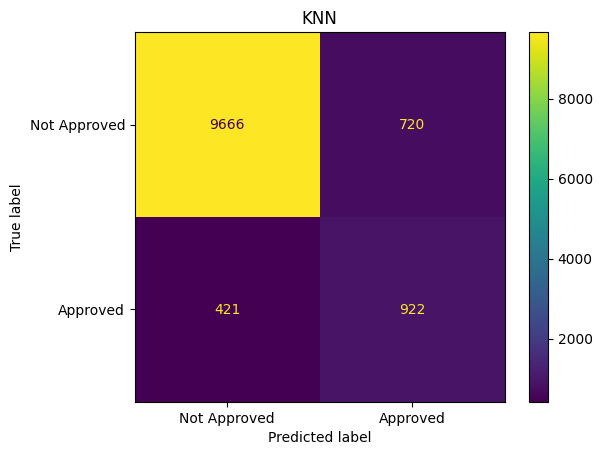

[LightGBM] [Info] Number of positive: 6708, number of negative: 40208
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000591 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 679
[LightGBM] [Info] Number of data points in the train set: 46916, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Info] Number of positive: 6680, number of negative: 40236
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000380 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 677
[LightGBM] [Info] Number of data points in the train set: 46916, number of used features: 9
[LightGBM] [Info] [binary:

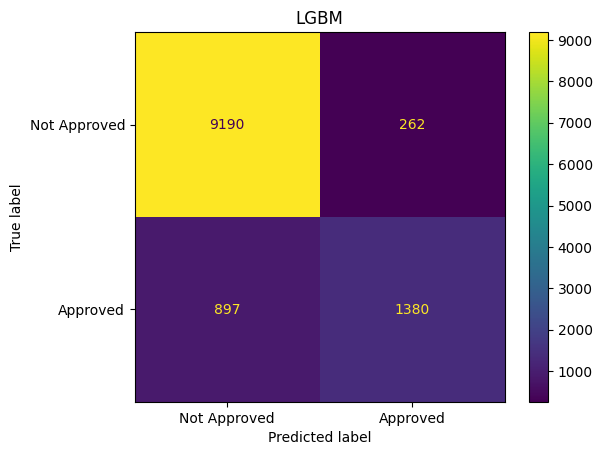

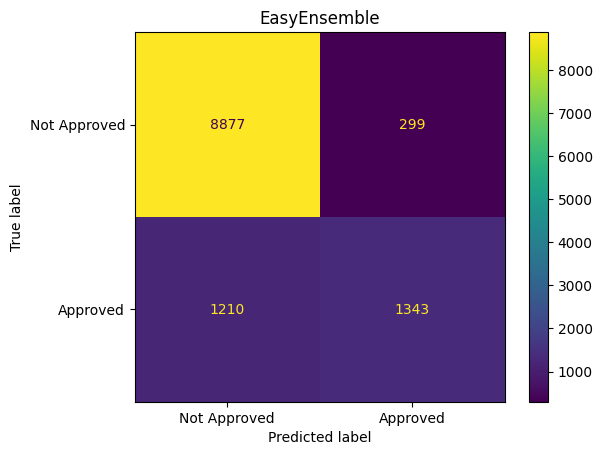

In [20]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from xgboost import XGBClassifier, XGBRFClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier, HistGradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score
from lightgbm import LGBMClassifier
from imblearn.ensemble import EasyEnsembleClassifier, BalancedRandomForestClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score

Model_dict = {
    'XGB': XGBClassifier(scale_pos_weight=len(Labels[Labels == 0]) / len(Labels[Labels == 1]), reg_lambda=2, reg_alpha=1),
    'XGBRF': XGBRFClassifier(scale_pos_weight=len(Labels[Labels == 0]) / len(Labels[Labels == 1]), reg_lambda=2, reg_alpha=1),
    'GaussianNB': GaussianNB(),
    'BernoulliNB': BernoulliNB(class_prior=[0.75, 0.25]),
    'DecisionTree': DecisionTreeClassifier(class_weight='balanced'),
    'RandomForest': RandomForestClassifier(class_weight='balanced'),
    'BalancedRandomForest': BalancedRandomForestClassifier(random_state=42),
    'AdaBoost': AdaBoostClassifier(),
    'Bagging': BaggingClassifier(),
    'ExtraTrees': ExtraTreesClassifier(class_weight='balanced'),
    'GB': GradientBoostingClassifier(),
    'HistGB': HistGradientBoostingClassifier(),
    'LogisticRegression': LogisticRegression(class_weight={0: 1, 1: 0.25}),
    'KNN': KNeighborsClassifier(),
    'LGBM': LGBMClassifier(class_weight='balanced', reg_lambda=2, reg_alpha=1),
    'EasyEnsemble': EasyEnsembleClassifier(random_state=42)
}
Training_Accuracy_dict = {}
Precision_dict = {}
Recall_dict = {}
F1_score_dict = {}
auc_score_dict = {}
cross_val_dict = {}

for key, val in Model_dict.items():
    val.fit(Features_train, Labels_train)
    
    train_pred = val.predict(Features_test)
    Training_Accuracy = accuracy_score(train_pred, Labels_test)
    Training_Accuracy_dict.update({key:Training_Accuracy})
    Pred_proba = val.predict_proba(Features_test)[:,1]
    f1_scores = cross_val_score(val, Features, Labels, cv=StratifiedKFold(n_splits=5), scoring='f1')
    
    Precision_dict.update({key:precision_score(train_pred,Labels_test)})
    Recall_dict.update({key:recall_score(train_pred,Labels_test)})
    F1_score_dict.update({key:f1_score(train_pred,Labels_test)})
    auc_score_dict.update({key: roc_auc_score(Labels_test, Pred_proba)})
    cross_val_dict.update({key: f1_scores.mean()})    
    fig, ax = plt.subplots()
    ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(train_pred,Labels_test), display_labels=['Not Approved', 'Approved']).plot(ax=ax)
    ax.set_title(key)
    plt.show()

In [21]:
accuracy_df = pd.DataFrame()
accuracy_df['Model Name'] = Model_dict.keys()
accuracy_df['Training Accuracy'] = Training_Accuracy_dict.values()
accuracy_df['AUC Score'] = auc_score_dict.values()
accuracy_df['Precision'] = Precision_dict.values()
accuracy_df['Recall'] = Recall_dict.values()
accuracy_df['F1 Score'] = F1_score_dict.values()
accuracy_df['Cross Validation'] = cross_val_dict.values()
accuracy_df

,Model Name,Training Accuracy,AUC Score,Precision,Recall,F1 Score,Cross Validation
0,XGB,0.902379,0.941814,0.822777,0.612698,0.702365,0.708992
1,XGBRF,0.901611,0.925022,0.792935,0.615312,0.692922,0.705786
2,GaussianNB,0.885753,0.846911,0.447625,0.629281,0.523132,0.525654
3,BernoulliNB,0.836729,0.751252,0.246650,0.373961,0.297248,0.296036
4,DecisionTree,0.900759,0.805891,0.666870,0.639603,0.652952,0.656202
5,RandomForest,0.925228,0.921879,0.661389,0.771855,0.712365,0.716457
6,BalancedRandomForest,0.881746,0.930644,0.827649,0.551766,0.662119,0.663740
7,AdaBoost,0.925313,0.920599,0.647381,0.781618,0.708195,0.707603
8,Bagging,0.924631,0.907303,0.654689,0.772270,0.708635,0.717205
9,ExtraTrees,0.915509,0.905271,0.652862,0.718017,0.683892,0.687882


In [22]:
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score, roc_auc_score

param_grid = {'learning_rate': [0.01, 0.1, 0.2], 'max_iter': [100, 200, 300], 'max_depth': [None, 10, 20], 'min_samples_leaf': [20, 30, 40], 'l2_regularization': [0, 1, 5]}

hgb = HistGradientBoostingClassifier(random_state=42, class_weight='balanced')

grid_search = GridSearchCV(estimator=hgb, param_grid=param_grid, cv=5, scoring='roc_auc', n_jobs=-1)

grid_search.fit(Features, Labels)

best_hist_gb = grid_search.best_estimator_
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best AUC Score:", best_score)

Best Parameters: {'l2_regularization': 5, 'learning_rate': 0.2, 'max_depth': 10, 'max_iter': 100, 'min_samples_leaf': 30}
Best AUC Score: 0.9428823593493002


In [47]:
df_test = pd.read_csv('Loan_test.csv')

submission_csv = pd.DataFrame()
submission_csv['id'] = df_test['id']

df_test.drop(columns={'id', 'person_age','person_age', 'person_emp_length', 'cb_person_cred_hist_length', 'loan_intent'}, axis=1,inplace=True)
df_test['loan_grade'] = le.fit_transform(df_test['loan_grade'])

categorical = df_test.select_dtypes(include='object').columns

colt = ColumnTransformer(transformers=[('encoder', OneHotEncoder(drop='first'), categorical)], remainder='passthrough')

df_test_encoded = colt.fit_transform(df_test)
df_test_encoded = colt.fit_transform(df_test)
encoded_features =  colt.named_transformers_['encoder'].get_feature_names_out(categorical)

df_test_encoded = pd.DataFrame(df_test_encoded, columns=list(encoded_features) + list(df_test.drop(columns=categorical).columns))
df_test_encoded.reset_index(drop=True, inplace=True)

catcol = df_test_encoded.select_dtypes(include='object').columns

for i in catcol:
    df_test_encoded[i] = df_test_encoded[i].astype(float)

df_test_encoded.dtypes

person_home_ownership_OTHER    float64
person_home_ownership_OWN      float64
person_home_ownership_RENT     float64
cb_person_default_on_file_Y    float64
person_income                  float64
loan_grade                     float64
loan_amnt                      float64
loan_int_rate                  float64
loan_percent_income            float64
dtype: object

In [49]:
hgb = grid_search.best_estimator_
hgb.fit(Features_train, Labels_train)

y_pred = hgb.predict(df_test_encoded)
y_pred_proba = hgb.predict_proba(df_test_encoded)[:,1]

submission_csv['loan_status'] = y_pred_proba
submission_csv.to_csv('202201473_EDA_Lab7.csv', index=False)

submission_csv

,id,loan_status
0,58645,0.996747
1,58646,0.198363
2,58647,0.978910
3,58648,0.078285
4,58649,0.689308
...,...,...
39093,97738,0.252266
39094,97739,0.034114
39095,97740,0.054750
39096,97741,0.879740
